In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data and explore

In [2]:
starwars = pd.read_csv('star_wars.csv',encoding = 'ISO-8859-1')

In [3]:
starwars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
starwars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Data clean

In [5]:
starwars.shape

(1187, 38)

In [6]:
starwars = starwars[starwars['RespondentID'].notnull()]

In [7]:
starwars.shape

(1186, 38)

Remove non 'RespndentID' rows

In [8]:
starwars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
starwars['Have you seen any of the 6 films in the Star Wars franchise?'].\
map({'Yes':True,'No':False})

In [9]:
starwars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
starwars['Do you consider yourself to be a fan of the Star Wars film franchise?']\
=starwars['Do you consider yourself to be a fan of the Star Wars film franchise?']\
.map({'Yes':True,'No':False})

In [11]:
starwars['Do you consider yourself to be a fan of the Star Wars film franchise?']\
.value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Convert column 2 and column 3 to boolean value

In [12]:
for item in starwars.columns[3:9]:
    starwars[item] = starwars[item].notnull()

In [13]:
starwars.rename(columns = {starwars.columns[3]:'seen_1',starwars.columns[4]:'seen_2',\
                          starwars.columns[5]:'seen_3',starwars.columns[6]:'seen_4',\
                          starwars.columns[7]:'seen_5',starwars.columns[8]:'seen_6',},inplace=True)

Convert columns 4-9 to boolean and simply column names 

In [14]:
starwars.iloc[:10,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2
7,6,5,4,3,1,2
8,4,5,6,3,2,1
9,5,4,6,2,1,3
10,1,2,3,4,5,6


In [16]:
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)

In [17]:
starwars[starwars.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [18]:
starwars.rename(columns = {starwars.columns[9]:'ranking_1',starwars.columns[10]:'ranking_2',\
                          starwars.columns[11]:'ranking_3',starwars.columns[12]:'ranking_4',\
                          starwars.columns[13]:'ranking_5',starwars.columns[14]:'ranking_6',},inplace=True)

In [19]:
starwars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

Convert columns 9-14 to float data type and simply columns names

# Data analysis

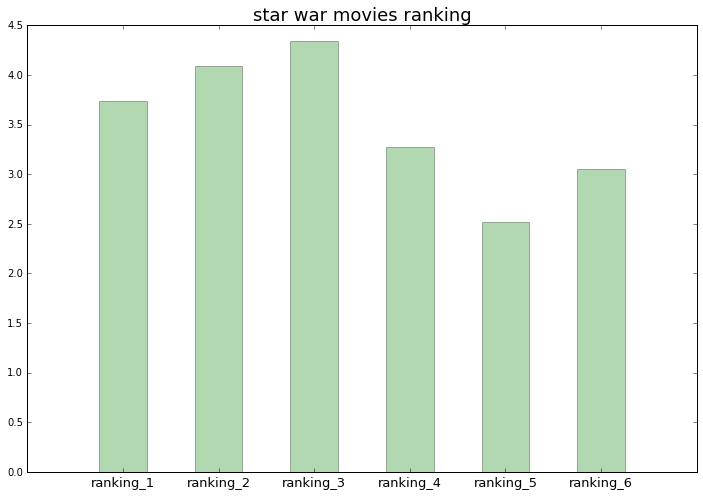

In [20]:
fig,ax = plt.subplots(figsize = (12,8))
left = np.arange(1,7)-0.25
height = starwars[starwars.columns[9:15]].mean().values
plt.bar(left,height,0.5,color = 'g',alpha = 0.3)
ax.set_title('star war movies ranking',fontsize = 18)
ax.set_xticks(np.arange(1,7))
ax.set_xticklabels(starwars.columns[9:15],fontsize = 13)

In [21]:
starwars[starwars.columns[9:15]].mean().values

array([3.73293413, 4.08732057, 4.34131737, 3.27272727, 2.51315789,
       3.04784689])

Fifth star war moive has the highest average ranking, so it is the most popular star war moive

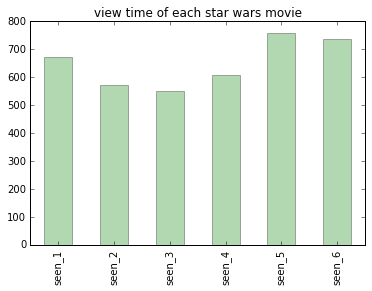

In [29]:
ax = starwars[starwars.columns[3:9]].sum().plot.bar(color='g',alpha=0.3)
ax.set_title('view time of each star wars movie')

The number of people who watched fifth star war moive is the largest compared with other star war moive view number.

In [30]:
males = starwars[starwars['Gender'] == 'Male']
females = starwars[starwars['Gender'] == 'Female']

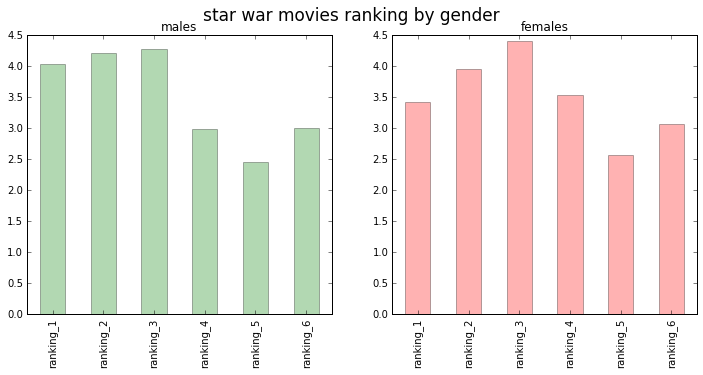

In [38]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize = (12,5))
fig.suptitle('star war movies ranking by gender',fontsize = 17)
males[males.columns[9:15]].mean().plot.bar(ax = ax1,color = 'g',alpha=0.3)
ax1.set_title('males')
females[females.columns[9:15]].mean().plot.bar(ax = ax2,color = 'r',alpha=0.3)
ax2.set_title('females')

Except star war movie 5, women prefer moive 6, but men prefer moive 4.

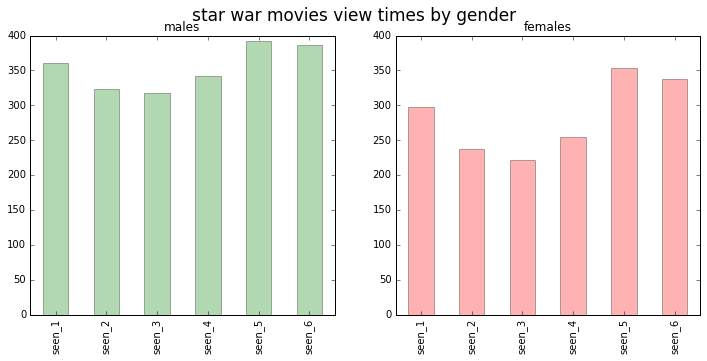

In [40]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize = (12,5))
fig.suptitle('star war movies view times by gender',fontsize = 17)
males[males.columns[3:9]].sum().plot.bar(ax = ax1,color = 'g',alpha=0.3)
ax1.set_title('males')
females[females.columns[3:9]].sum().plot.bar(ax = ax2,color = 'r',alpha=0.3)
ax2.set_title('females')

In [41]:
starwars.Gender.value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

Men watched more star war moives than women did.